In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../..')))
from config.path import get_training_data_path
from src.pipeline.modules.clip import ClipClassifier, ClipFast
from src.pipeline.modules.helper import rotation_image_proper
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
clip_instance = ClipFast(model_name='ViT-B/16')

In [3]:
class_name = 'shirt'
relative_path = get_training_data_path('classifier', class_name)
fullpath = os.path.join(relative_path, 'frame_175_pant__.jpg')

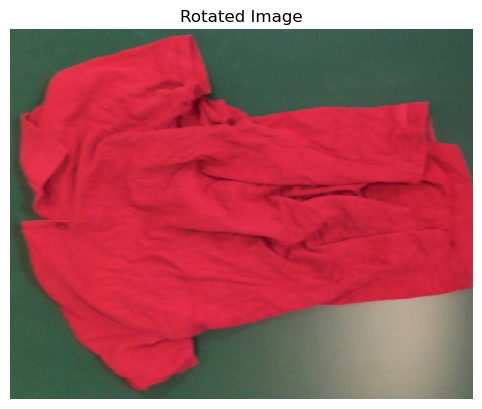

Value: 0.45263671875, Index: shirt
Value: 0.2421875, Index: pant
Value: 0.1885986328125, Index: tshirt
Highest Pair
['shirt', 0.45263671875]


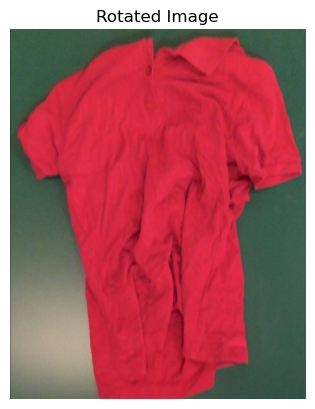

Value: 0.748046875, Index: pant
Value: 0.1495361328125, Index: shirt
Value: 0.06634521484375, Index: tshirt
Highest Pair
['pant', 0.748046875]


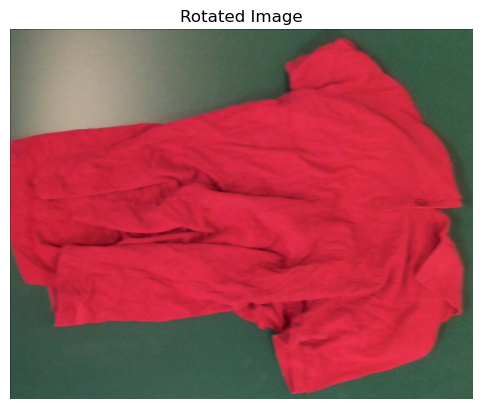

Value: 0.5, Index: pant
Value: 0.2398681640625, Index: shirt
Value: 0.10809326171875, Index: jacket
Highest Pair
['pant', 0.5]


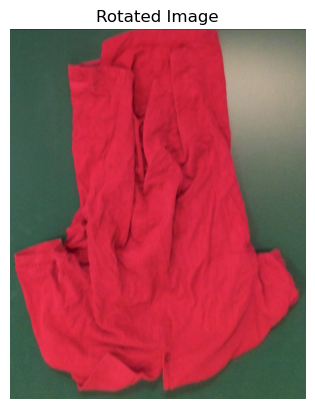

Value: 0.6748046875, Index: pant
Value: 0.176025390625, Index: skirt
Value: 0.053680419921875, Index: shirt
Highest Pair
['pant', 0.6748046875]


In [4]:
image = cv2.imread(fullpath)

rot_accuracy = []

for i in range(0,4):

    rot_frame_rgb = rotation_image_proper(image, -90*i)

    # Display the rotated image using Matplotlib
    plt.imshow(rot_frame_rgb)
    plt.title('Rotated Image')
    plt.axis('off')  # Hide axis
    plt.show()

    clip_instance.image = rot_frame_rgb
    res = clip_instance.process(rot_frame_rgb)
    rot_accuracy.append(res)

In [6]:
# Initialize an empty list to store unique items
unique_items = []

# Initialize an empty set to track items that have already been added
seen_items = set()

# Loop through each item and add it to the list if it's not a duplicate
for item in rot_accuracy:
    if item[0] not in seen_items:
        unique_items.append(item[0])
        seen_items.add(item[0])

# Print the resulting list of unique items
item_list = []
for u_item in unique_items:
    ls = [item for item in rot_accuracy if u_item in item]
    item_list.append(ls)

# Initialize a dictionary to store sums and counts for each type
sums_counts = {}

# Iterate through the nested list to update sums and counts
for sublist in item_list:
    for item in sublist:
        item_type = item[0]
        value = item[1]
        
        if item_type not in sums_counts:
            sums_counts[item_type] = {'sum': 0, 'count': 0}
        
        sums_counts[item_type]['sum'] += value
        sums_counts[item_type]['count'] += 1

# Calculate the averages
averages = {}
for item_type, values in sums_counts.items():
    averages[item_type] = values['sum'] / values['count']

# Print the resulting averages
#print(averages)
max_item_type = max(averages, key=averages.get)
print(averages)

{'shirt': 0.45263671875, 'pant': 0.6409505208333334}
